In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,FunctionTransformer,PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression




In [25]:
file='aug_train.csv'

df=pd.read_csv(file)

enrollee_id                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
city_development_index    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
training_hours            AxesSubplot(0.672059,0.657941;0.227941x0.222059)
target                       AxesSubplot(0.125,0.391471;0.227941x0.222059)
dtype: object

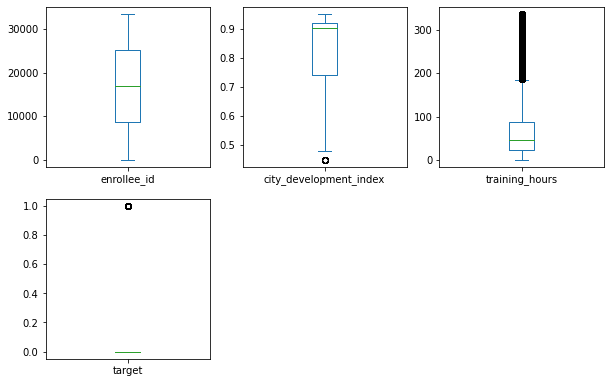

In [30]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10))

In [20]:
df=df.drop(['enrollee_id','city'],axis=1)
X=df.drop('target',axis=1)
y=df['target']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=97)

In [8]:
numeric_features=['city_development_index','training_hours']
categorical_features=list(df.drop(numeric_features,axis=1).drop('target',axis=1))

In [14]:
#toarray is used to match the shape of the data
def encoder(x):
    enc=OneHotEncoder(handle_unknown='ignore',drop='first')
    enc_data=pd.DataFrame(enc.fit_transform(x).toarray())
    enc_data.columns=enc.get_feature_names_out()
    return enc_data

encoders = FunctionTransformer(encoder)

In [7]:
numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean'))
      ,('scaler', PowerTransformer())
      ])

categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='constant'))
      ,('encoder', encoders)
      ])

In [9]:
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
]) 

In [10]:
model_name = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=42,max_iter=1000)

In [11]:
# This cell is the main pipeline for the analysis.
pipe = make_pipeline(preprocessor, model_name)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  ['city_development_index',
                                                   'training_hours']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                                                   FunctionTransformer(func=<function encoder at 0x00000228B4BD73A0>))]),
                                                  ['gender',
                                                   'relevent_experience',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'experience', 'company_size',
                                                   'company_type',
                                                   'last_new_job'])])),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [12]:
y_pred_test = pipe.predict(X_test)

In [13]:
# This cell is the step to test the accuracy of the model.
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, y_pred_test))

0.7012004175365344
